In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

#from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

#Keras CNN

import time
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Embedding, Activation, AveragePooling2D, GlobalMaxPooling2D
from keras.utils import to_categorical
from keras.layers import Conv1D, GlobalMaxPooling1D

%matplotlib inline




Using TensorFlow backend.


In [2]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.savefig('accuracy_ctxt1.png', bbox_inches='tight')
    plt.show()

In [6]:
from sklearn.model_selection import KFold

context = 1
# Charger les features et labels
if context :
    #avec context
    ft_SIWIS = np.load('ft_SIWIS_ctxt.npz.npy')
    labels_SIWIS = np.load('labels_SIWIS_ctxt.npz.npy')
else :
    #sans context
    ft_SIWIS = np.load('ft_SIWIS.npz.npy')
    labels_SIWIS = np.load('labels_SIWIS.npz.npy')
# K-Fold
nfolds = 10
kf = KFold(n_splits=nfolds)
train_index = []
test_index = []
for train, test in kf.split(range(len(labels_SIWIS))):
    train_index.append(train)
    test_index.append(test)

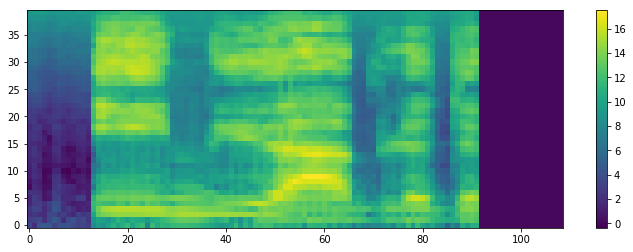

1


In [9]:
from matplotlib import cm
ind = 6
plt.figure(figsize=(12, 4))
plt.imshow((ft_SIWIS[ind].T.astype(np.float32)),  aspect='auto', origin='lower')
plt.colorbar()
plt.show()
print(list(labels_SIWIS)[ind])


In [10]:
def X_features(features, nbl, nmels) :
    #centre = (features.shape[1])/2
    #X = features[:,centre-(nbl/2):centre+(nbl/2),:]
    X = features[:,:nbl,:]
    X = X.reshape(len(X),1,nbl,nmels)
    return X


In [13]:
def get_features(labels, ft, nbl, train_index, test_index, fold, context) : 
    labels_train = labels[train_index[fold]]
    labels_test = labels[test_index[fold]]
    nmels = 40

    ft_train = ft[train_index[fold]]
    ft_test = ft[test_index[fold]]

    X_train = X_features(ft_train, nbl, nmels)
    X_test = X_features(ft_test, nbl, nmels)
    #y_train = pd.Categorical([lab for sub in labels_train for lab in sub ])
    #y_test = pd.Categorical([lab for sub in labels_test for lab in sub])
        
    y_train = pd.Categorical(labels_train)
    y_test = pd.Categorical(labels_test)
    return X_train, y_train, X_test, y_test

def scores(reference, test):
    tab = (pd.crosstab(reference, test)).astype(float)
    sco = np.repeat(0.0, 5)
    # SUCCES GLOBAL
    sco[0]=(tab[0][0]+tab[1][1])/(sum(tab[0])+sum(tab[1]))
    # HIT RATE H
    sco[1]=tab[1][1]/sum(tab[1])
    # FALSE ALARM RATE FAR
    sco[2]=tab[1][0]/sum(tab[0])
    # SCORE DE PIERCE PSS = H-F
    sco[3]=sco[1]-sco[2]
    # MISS RATE MSA
    sco[4]= tab[0][1] / (tab[0][1] + tab[1][1])
    
    return sco

Train on 3270 samples, validate on 364 samples
Epoch 1/50
3270/3270 [==============================] - 22s 7ms/step - loss: 1.0018 - acc: 0.5046 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 2/50
3270/3270 [==============================] - 22s 7ms/step - loss: 0.6914 - acc: 0.5278 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 3/50
3270/3270 [==============================] - 23s 7ms/step - loss: 0.6895 - acc: 0.5450 - val_loss: 0.6857 - val_acc: 0.5220
Epoch 4/50
3270/3270 [==============================] - 23s 7ms/step - loss: 0.6804 - acc: 0.5713 - val_loss: 0.6757 - val_acc: 0.5412
Epoch 5/50
3270/3270 [==============================] - 22s 7ms/step - loss: 0.6686 - acc: 0.5914 - val_loss: 0.6379 - val_acc: 0.6923
Epoch 6/50
3270/3270 [==============================] - 24s 7ms/step - loss: 0.6459 - acc: 0.6312 - val_loss: 0.5838 - val_acc: 0.7170
Epoch 7/50
3270/3270 [==============================] - 22s 7ms/step - loss: 0.6485 - acc: 0.6272 - val_loss: 0.5845 - val_acc: 0.7555
Epoch 8/

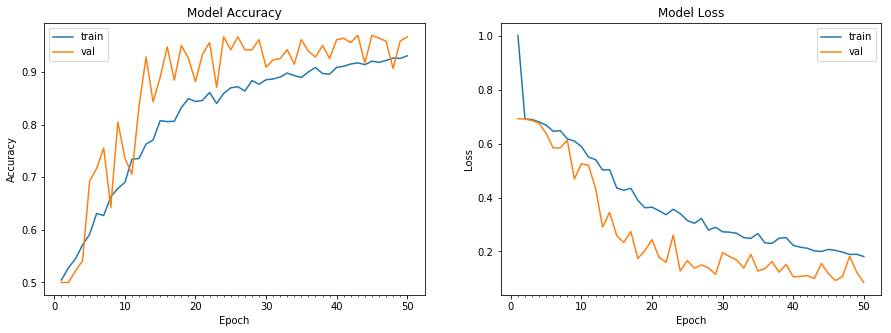

In [7]:

nbl = 109
nmels = 40
fold = 0
#train and test set according to the chosen fold
X_train, y_train, X_test, y_test = get_features(labels_SIWIS, ft_SIWIS, nbl, train_index, test_index, fold, context)
from keras import regularizers, optimizers

batch_size = 128
epochs = 50
# Define the model
model = Sequential()
model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu', input_shape = (1,nbl,nmels), data_format='channels_first'))
model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu', data_format='channels_first'))
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu', data_format='channels_first'))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

adam = optimizers.Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
start = time.time()
m = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)) #
end = time.time()
print("Model took %0.2f seconds to train" %(end - start))
plot_model_history(m)

In [29]:
from keras.models import load_model

suf = str(nbl)+"l.h5"
if context :
    model.save('cnn_ctxt_'+suf) # creates a HDF5 file 
else :
    model.save('cnn_Noctxt_'+suf)  

y_pred = model.predict(X_test)
pred = (y_pred>0.6).astype(int)
print(model.evaluate(X_test, y_test))
#Confusion matrix
pd.crosstab(np.ndarray.flatten(pred), np.asarray(y_test))

364/364 [==============================] - 1s 4ms/step
[0.33159065688704398, 0.87087912087912089]


col_0,0,1
row_0,,
0,179,51
1,3,131


Train on 2907 samples, validate on 727 samples
Epoch 1/40
2907/2907 [==============================] - 18s 6ms/step - loss: 0.8212 - acc: 0.5091 - val_loss: 0.6926 - val_acc: 0.5213
Epoch 2/40
2907/2907 [==============================] - 18s 6ms/step - loss: 0.6935 - acc: 0.5108 - val_loss: 0.6901 - val_acc: 0.5915
Epoch 3/40
2907/2907 [==============================] - 18s 6ms/step - loss: 0.6914 - acc: 0.5222 - val_loss: 0.6782 - val_acc: 0.6300
Epoch 4/40
2907/2907 [==============================] - 19s 6ms/step - loss: 0.6885 - acc: 0.5287 - val_loss: 0.6781 - val_acc: 0.5736
Epoch 5/40
2907/2907 [==============================] - 19s 7ms/step - loss: 0.6799 - acc: 0.5783 - val_loss: 0.6828 - val_acc: 0.5007
Epoch 6/40
2907/2907 [==============================] - 18s 6ms/step - loss: 0.6682 - acc: 0.5924 - val_loss: 0.6430 - val_acc: 0.6286
Epoch 7/40
2907/2907 [==============================] - 19s 6ms/step - loss: 0.6500 - acc: 0.6343 - val_loss: 0.6523 - val_acc: 0.5750
Epoch 8/

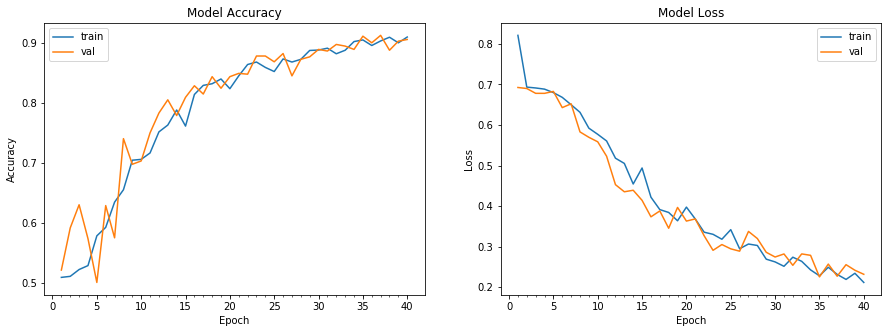

In [10]:
# Apprentissage avec contexte : all data

from keras import regularizers, optimizers


nbl = 111
nmels = 40
y_train = pd.Categorical(labels_SIWIS)
shape = ft_SIWIS.shape
X_train = ft_SIWIS.reshape(shape[0], 1, shape[1], shape[2])


batch_size = 128
epochs = 40
# Define the model
model = Sequential()
model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu', input_shape = (1,nbl,nmels), data_format='channels_first'))
model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu', data_format='channels_first'))
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu'))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
adam = optimizers.Adam(lr=1e-5)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

start = time.time()

m = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2) #
end = time.time()
print("Model took %0.2f seconds to train" %(end - start))
plot_model_history(m)


In [ ]:
### AVEC CONTEXTE  : Validation croisée


from keras import regularizers, optimizers
nb_sc = 5
scores_mat = np.zeros((nfolds, nb_sc))
    
for fold in range(nfolds) :
    batch_size = 128
    epochs = 40
    # Define the model
    model = Sequential()
    model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu', input_shape = (1,nbl,nmels), data_format='channels_first'))
    model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu', data_format='channels_first'))
    model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))

    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    adam = optimizers.Adam(lr=1e-5)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

    X_train, y_train, X_test, y_test = get_features(labels_SIWIS, ft_SIWIS, train_index, test_index, fold, context) 
    start = time.time()
    m = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2) #
    end = time.time()
    print("Model took %0.2f seconds to train" %(end - start))
    plot_model_history(m)
    y_pred = model.predict(X_test)
    pred = (y_pred>0.5).astype(int)
    scores_mat[fold,:] = scores(np.ndarray.flatten(pred), np.asarray(y_test))

Train on 3270 samples, validate on 364 samples
Epoch 1/30
3270/3270 [==============================] - 22s 7ms/step - loss: 0.7069 - acc: 0.5728 - val_loss: 0.7159 - val_acc: 0.5714
Epoch 2/30
3270/3270 [==============================] - 22s 7ms/step - loss: 0.6865 - acc: 0.5985 - val_loss: 0.6535 - val_acc: 0.5879
Epoch 3/30
3270/3270 [==============================] - 21s 7ms/step - loss: 0.6375 - acc: 0.6382 - val_loss: 0.6102 - val_acc: 0.6401
Epoch 4/30
3270/3270 [==============================] - 21s 6ms/step - loss: 0.5843 - acc: 0.7055 - val_loss: 0.5862 - val_acc: 0.6456
Epoch 5/30
3270/3270 [==============================] - 21s 6ms/step - loss: 0.5310 - acc: 0.7514 - val_loss: 0.7496 - val_acc: 0.5055
Epoch 6/30
3270/3270 [==============================] - 21s 6ms/step - loss: 0.5040 - acc: 0.7801 - val_loss: 0.7951 - val_acc: 0.5000
Epoch 7/30
3270/3270 [==============================] - 21s 6ms/step - loss: 0.4884 - acc: 0.7979 - val_loss: 0.6928 - val_acc: 0.5275
Epoch 8/

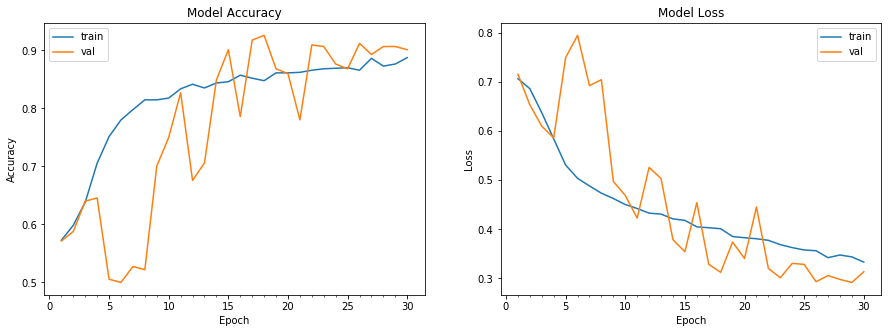

In [15]:
#Results for one fold
from keras.layers.normalization import BatchNormalization

nbl = 109
nmels = 40
fold = 0
X_train, y_train, X_test, y_test = get_features(labels_SIWIS, ft_SIWIS, nbl, train_index, test_index, fold, context)
from keras import regularizers, optimizers

batch_size = 128
epochs = 30

model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape = (1,nbl,nmels), data_format='channels_first'))
model.add(Activation("relu"))
model.add(Conv2D(8, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D( pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (5, 5), data_format='channels_first'))
model.add(Activation("relu"))
model.add(Conv2D(16, (5, 5)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D( pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))

adam = optimizers.Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
start = time.time()
m = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)) #
end = time.time()
print("Model took %0.2f seconds to train" %(end - start))
plot_model_history(m)